In [2]:
import cv2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
img = cv2.imread("photo3.jpg")
#選取blue通道
bluechannelmat = img[:,:,0] #img[:,:,0] 提取圖像的藍色通道（BGR 中的 B，索引為 0），得到單通道灰度圖 bluechannelmat
#均值濾波(濾波窗口越大圖像越模糊
blurmat = cv2.blur(bluechannelmat,(5,5)) #5,5表卷積核大小是5x5
#動態閥值分割(otsu)
t,thresmat = cv2.threshold(blurmat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#cv2.THRESH_BINARY 表示將圖像二值化，像素值大於閾值設為 255（白色），小於等於閾值設為 0（黑色）
#cv2.THRESH_OTSU 自動計算最佳閾值，返回閾值 t 和二值化圖像 thresmat
t,thresmat = cv2.threshold(blurmat,70,255,cv2.THRESH_BINARY_INV)
#cv2.THRESH_BINARY_INV 表示像素值小於等於 70 設為 255（白色），大於 70 設為 0（黑色）
#核為矩形5x5腐蝕
k1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))#生成形狀為矩形5x5的卷積核
x0 = cv2.erode(thresmat,k1)

#核為圓形9x9開運算
k2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
x1 = cv2.morphologyEx(thresmat,cv2.MORPH_OPEN,k2)

#9x9橢圓核開閉運算
x1 = cv2.morphologyEx(x1,cv2.MORPH_OPEN,k2)
x2 = cv2.morphologyEx(x1,cv2.MORPH_CLOSE,k2)

#計算連通區域面積
#查找圖像輪廓，參數分別表示只檢測外輪廓，儲存所有輪廓點
contours,hierarchy = cv2.findContours(x2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

#計算輪廓面積
contoursArea=[]#儲存面積的列表
contours_sel=[]#儲存符合要求的輪廓
for i in range(len(contours)):
    temp = cv2.contourArea(contours[i])
    if temp > 30: #篩選出面積大於30的輪廓
        contoursArea.append(temp)
        contours_sel.append(contours[i])

#繪製輪廓，第一個參數是繪製輪廓的圖，第二個參數是使用的輪廓
#第一個-1表示繪製所有輪廓，(0,255,0)是使用的顏色，第二個-1表示填充輪廓內部
x2 = cv2.drawContours(img,contours_sel,-1,(0,255,0),-1)
cv2.imshow("photo3",x2)# 顯示圖像
cv2.waitKey()
cv2.destroyAllWindows()

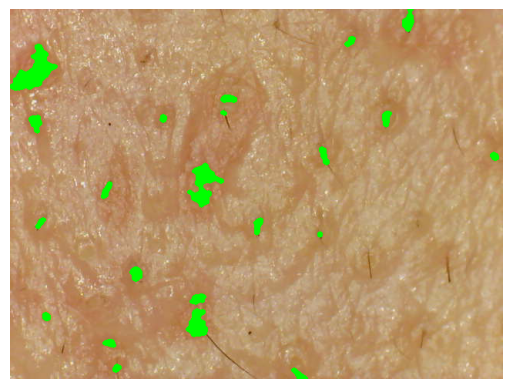

In [40]:
img = cv2.imread("photo3.jpg")
#選取blue通道
bluechannelmat = img[:,:,0] #img[:,:,0] 提取圖像的藍色通道（BGR 中的 B，索引為 0），得到單通道灰度圖 bluechannelmat
#均值濾波(濾波窗口越大圖像越模糊
blurmat = cv2.blur(bluechannelmat,(5,5)) #5,5表卷積核大小是5x5
#動態閥值分割(otsu)
t,thresmat = cv2.threshold(blurmat,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#cv2.THRESH_BINARY 表示將圖像二值化，像素值大於閾值設為 255（白色），小於等於閾值設為 0（黑色）
#cv2.THRESH_OTSU 自動計算最佳閾值，返回閾值 t 和二值化圖像 thresmat
t,thresmat = cv2.threshold(blurmat,70,255,cv2.THRESH_BINARY_INV)
#cv2.THRESH_BINARY_INV 表示像素值小於等於 70 設為 255（白色），大於 70 設為 0（黑色）
#核為矩形5x5腐蝕
k1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))#生成形狀為矩形5x5的卷積核
x0 = cv2.erode(thresmat,k1)

#核為圓形9x9開運算
k2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
x1 = cv2.morphologyEx(thresmat,cv2.MORPH_OPEN,k2)

#9x9橢圓核開閉運算
x1 = cv2.morphologyEx(x1,cv2.MORPH_OPEN,k2)
x2 = cv2.morphologyEx(x1,cv2.MORPH_CLOSE,k2)

#計算連通區域面積
#查找圖像輪廓，參數分別表示只檢測外輪廓，儲存所有輪廓點
contours,hierarchy = cv2.findContours(x2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

#計算輪廓面積
contoursArea=[]#儲存面積的列表
contours_sel=[]#儲存符合要求的輪廓
for i in range(len(contours)):
    temp = cv2.contourArea(contours[i])
    if temp > 30: #篩選出面積大於30的輪廓
        contoursArea.append(temp)
        contours_sel.append(contours[i])

#繪製輪廓，第一個參數是繪製輪廓的圖，第二個參數是使用的輪廓
#第一個-1表示繪製所有輪廓，(0,255,0)是使用的顏色，第二個-1表示填充輪廓內部
x2 = cv2.drawContours(img,contours_sel,-1,(0,255,0),-1)
#cv2.imshow("photo3",x2)# 顯示圖像
#cv2.waitKey()
#cv2.destroyAllWindows()
x2_rgb = cv2.cvtColor(x2, cv2.COLOR_BGR2RGB)
plt.imshow(x2_rgb)
plt.axis('off') 
plt.show()